Classes = [N:0, S:1, V:2, F:3, Q:4]

* N: Non Ectopic beats (Normal beats)
* S: Supraventrical ectopic beats
* V: Ventricular ectopic beats
* F: Fusion beats
* Q: Unknown beats

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [4]:
#reading dataset
train_data = pd.read_csv("/gdrive/MyDrive/capstone/mitbih_train.csv", header = None)
test_data = pd.read_csv("/gdrive/MyDrive/capstone/mitbih_test.csv", header = None)

In [5]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


**Exploratory Data Analysis**

In [6]:
# checking null values
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [7]:
train_data.iloc[:, 187].unique()

array([0., 1., 2., 3., 4.])

In [8]:
# casting into int
train_data[187] = train_data[187].astype('int')

In [9]:
test_data[187] = test_data[187].astype('int')

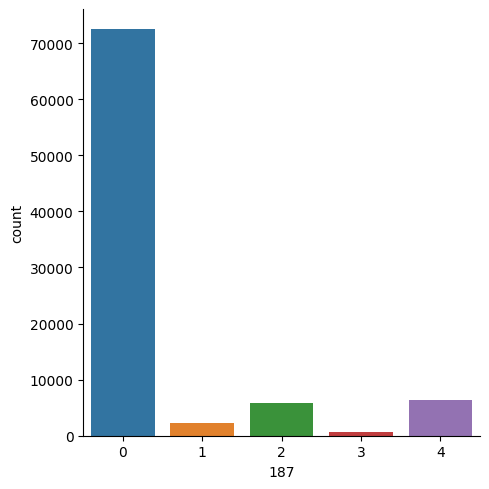

In [10]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_data)

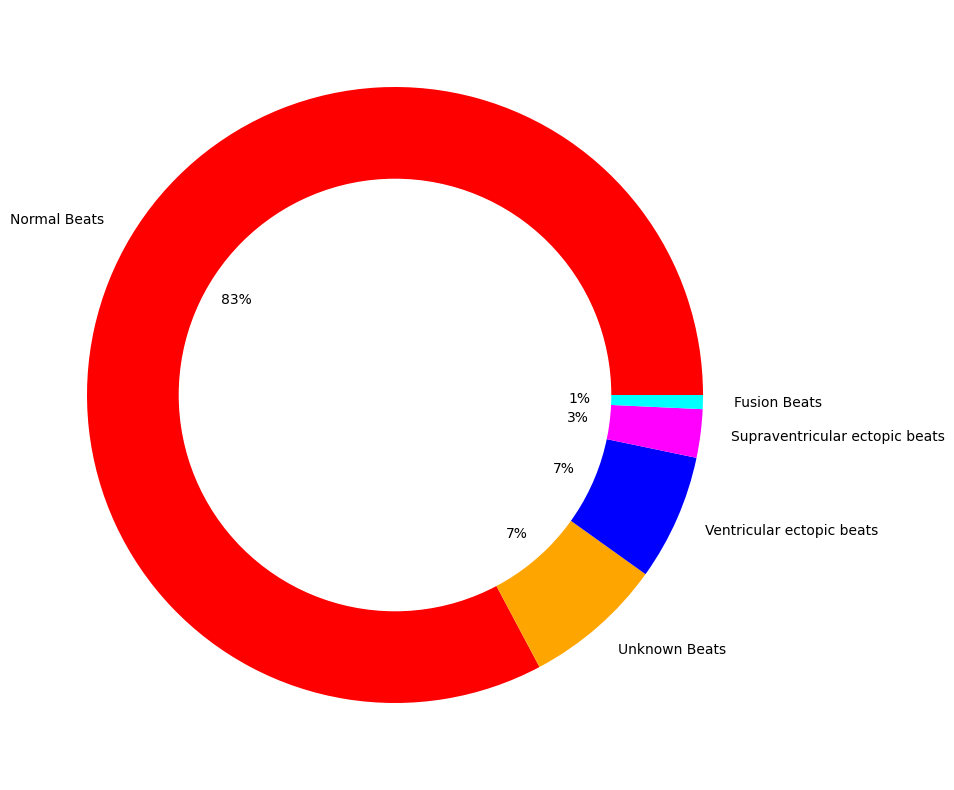

In [11]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

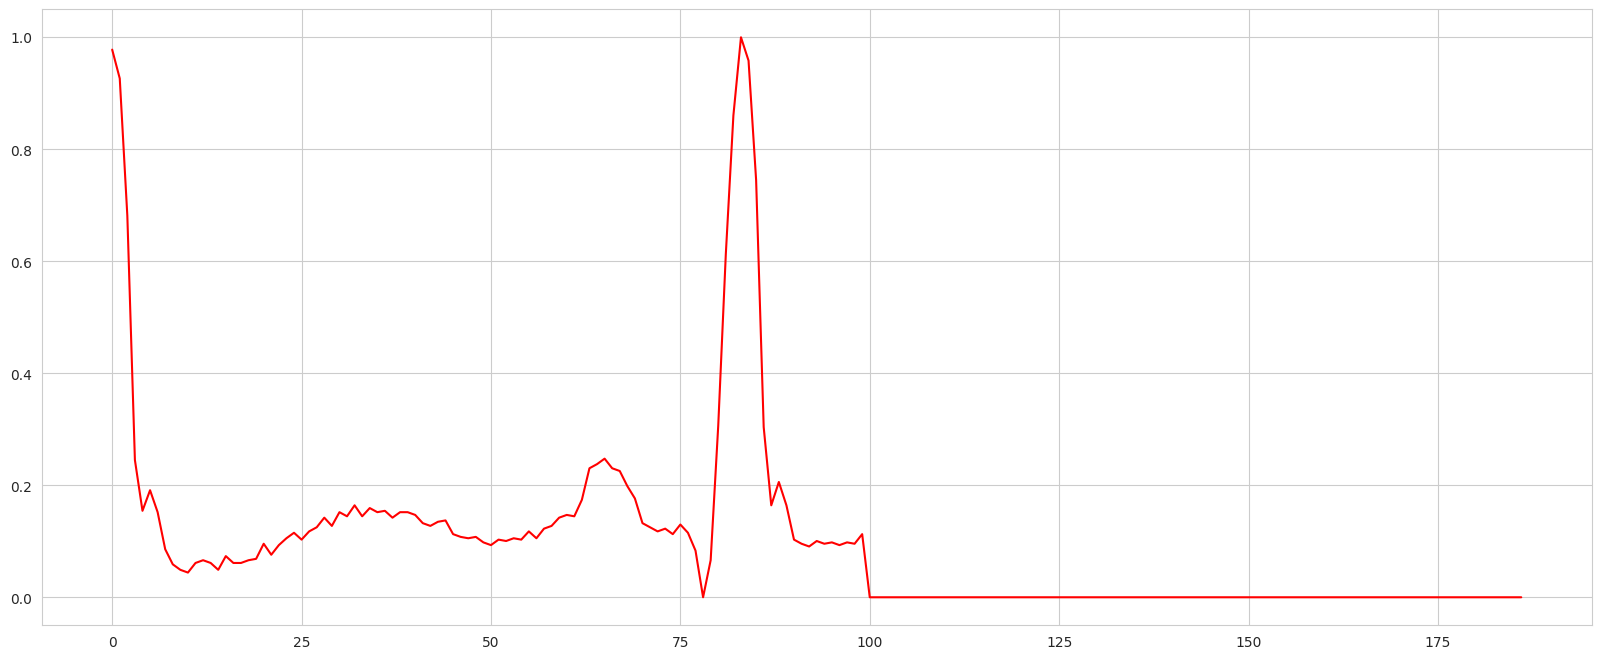

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red')
plt.show()

In [13]:
# Splitting data into Each Classes
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

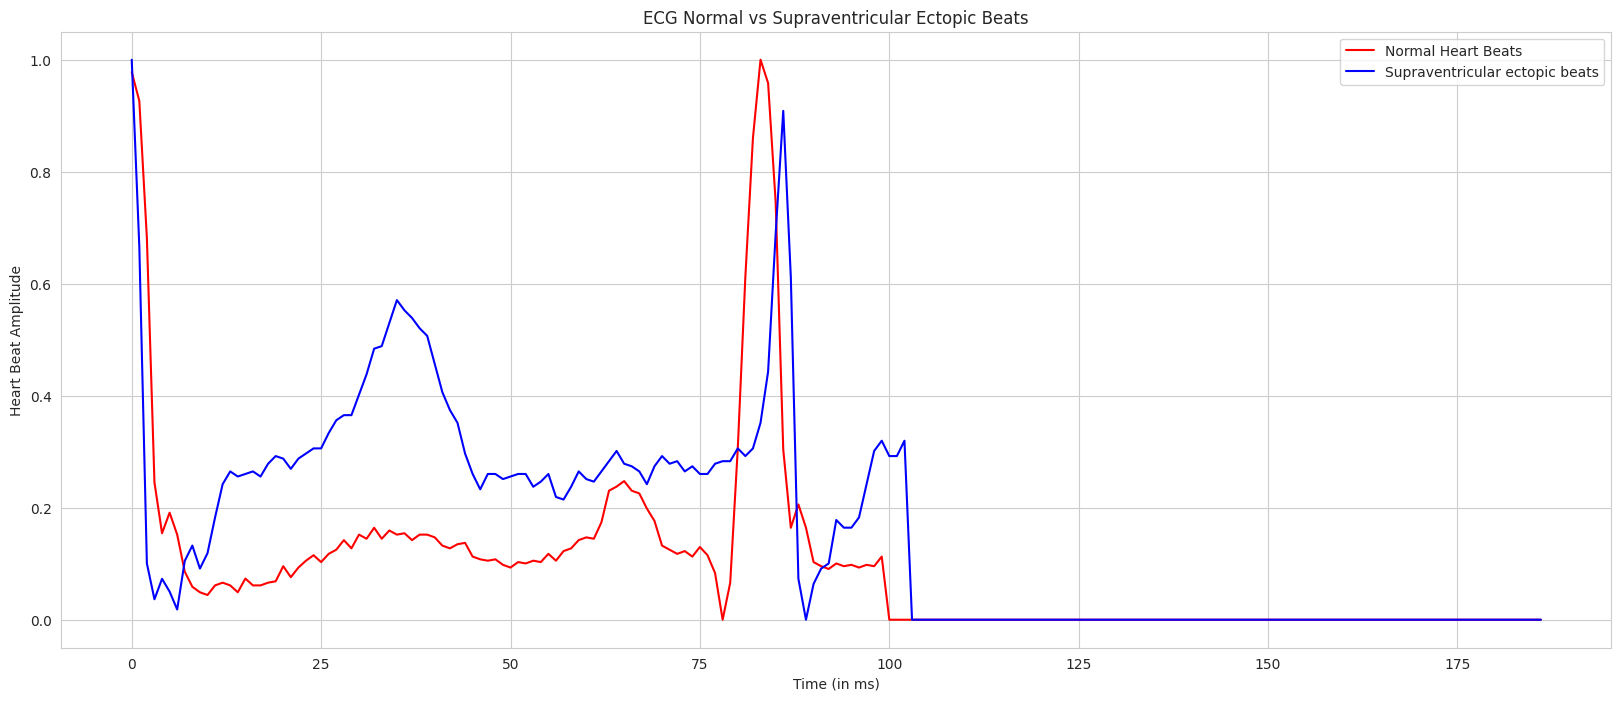

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'blue', label = 'Supraventricular ectopic beats')
plt.title("ECG Normal vs Supraventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

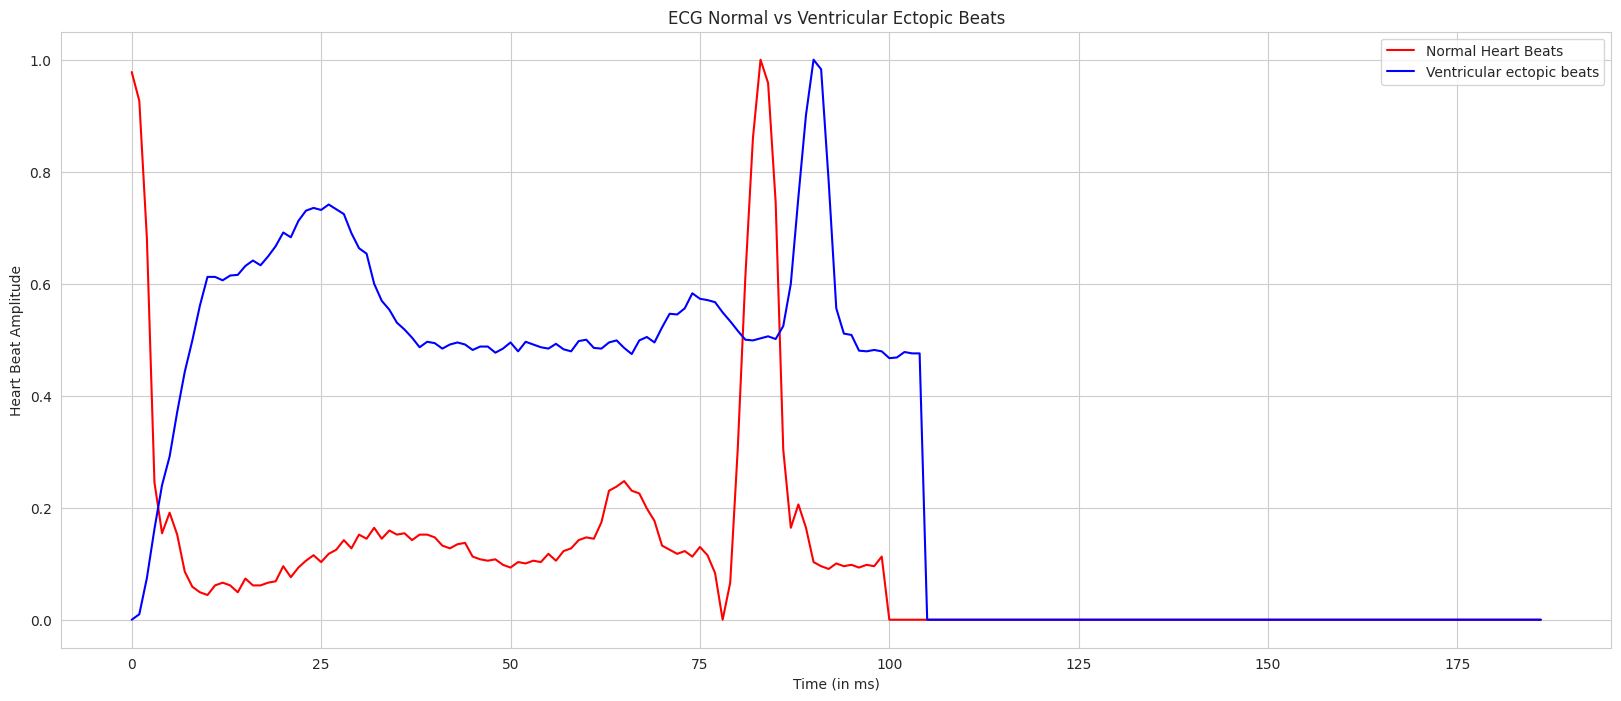

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'red', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'blue', label = 'Ventricular ectopic beats')
plt.title("ECG Normal vs Ventricular Ectopic Beats", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

**Data Augmentation**
* Since data is biased we will upsample it

In [16]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [17]:
# downsample the high number of counts in one class, select random samples 2000 samples from class 0 samples
df_0 = train_data[train_data[187]==0].sample(n =20000, random_state=123)

In [18]:
# merge and all dataframes to create new train samples
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

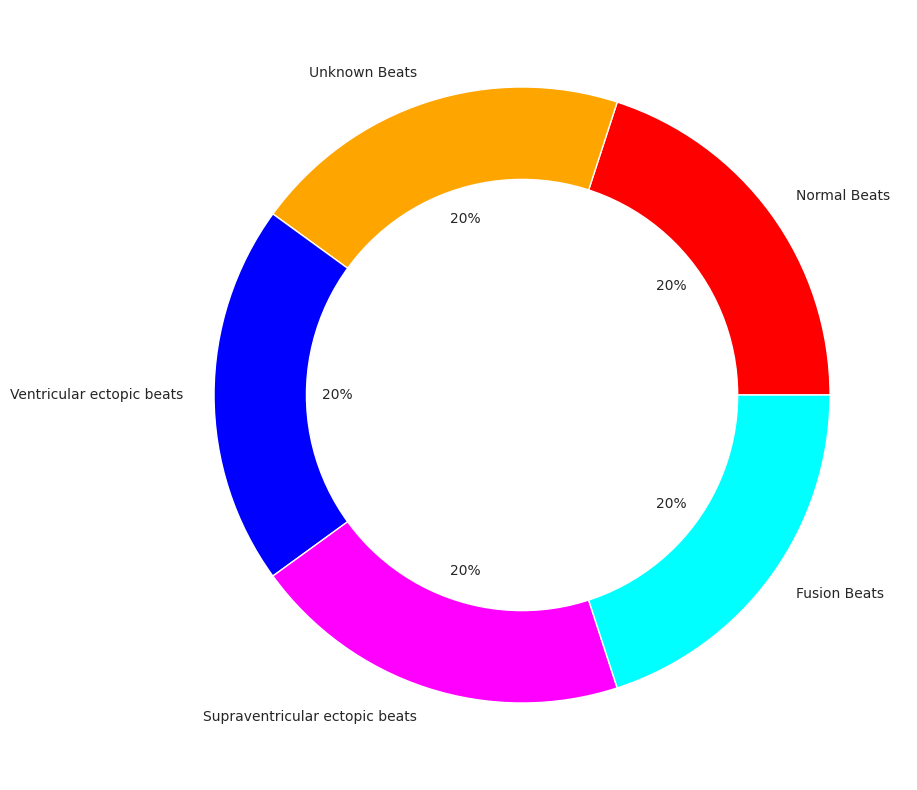

In [19]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

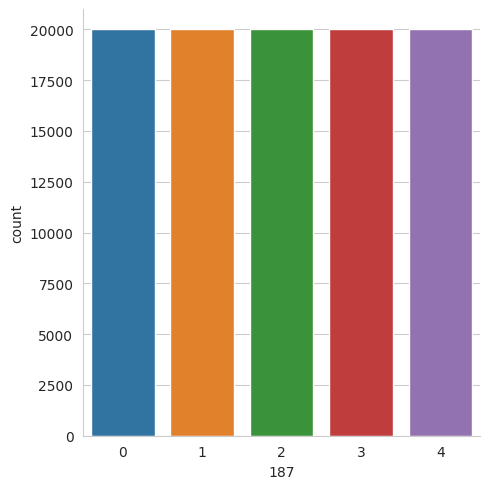

In [20]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data
sns.catplot(x = 187, kind = 'count', data = train_df)

In [21]:
# target Y
target_train = train_df[187]
target_test = test_data[187]

In [22]:
target_train.unique()

array([0, 1, 2, 3, 4])

In [23]:
# convert integer values into categorical one hot encoding
# Class 1 - [0,1,0,0,0]
# Class 4 - [0,0,0,0,1]

In [24]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(target_train)

In [25]:
y_test = to_categorical(target_test)

In [26]:
X_train = train_df.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values

In [27]:
# this data is in single dimension, 1D (no of samples, features)
X_train.shape

(100000, 187)

In [28]:
# For conv1D dimentionality should be 187X1 where 187 is number of features and 1 = 1D Dimentionality of data
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)

In [29]:
X_train.shape

(100000, 187, 1)

**CNN - Conv1D**

In [30]:
from keras.models import Sequential
from keras.layers import Dense # for fully connected layers dense will be used
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam

# avoid overfitting by normalizing the samples
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [31]:
def build_model():
    model = Sequential()

    # Filters = Units in Dense Total number of Neurons
    # Padding = 'same' , zero-padding, Add zero pixels all around input data
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='tanh', padding = 'same', input_shape = (187, 1))) #we pass individual values hence not 100000,187,1

    # Normalization to avoid overfitting
    model.add(BatchNormalization())

    # Pooling
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D(filters = 64, kernel_size = 6, activation='tanh', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    model.add(Conv1D( filters = 64, kernel_size = 6, activation='tanh', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))

    # Flatten
    model.add(Flatten())

    # Fully connected layer
    # input layer
    model.add(Dense(units = 64, activation='tanh'))

    # Hidden Layer
    model.add(Dense(units = 64, activation='tanh'))

    # Output Layer
    model.add(Dense(units = 5, activation='softmax'))

    # loss = 'categorical_crossentropy'
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [32]:
model = build_model()

In [33]:
# This is for one sample, i.e. one row
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 64)           448       
                                                                 
 batch_normalization (BatchN  (None, 187, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 94, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 94, 64)           256       
 hNormalization)                                                 
                                                        

In [34]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/15
3125/3125 [==============================] - 43s 10ms/step - loss: 0.2387 - accuracy: 0.9151 - val_loss: 0.2858 - val_accuracy: 0.8959
Epoch 2/15
3125/3125 [==============================] - 36s 11ms/step - loss: 0.1166 - accuracy: 0.9593 - val_loss: 0.2140 - val_accuracy: 0.9252
Epoch 3/15
3125/3125 [==============================] - 28s 9ms/step - loss: 0.0883 - accuracy: 0.9694 - val_loss: 0.1724 - val_accuracy: 0.9411
Epoch 4/15
3125/3125 [==============================] - 28s 9ms/step - loss: 0.0754 - accuracy: 0.9739 - val_loss: 0.1155 - val_accuracy: 0.9646
Epoch 5/15
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0625 - accuracy: 0.9784 - val_loss: 0.1655 - val_accuracy: 0.9511
Epoch 6/15
3125/3125 [==============================] - 30s 9ms/step - loss: 0.0553 - accuracy: 0.9809 - val_loss: 0.1381 - val_accuracy: 0.9566
Epoch 7/15
3125/3125 [==============================] - 28s 9ms/step - loss: 0.0513 - accuracy: 0.9829 - val_loss: 0.1426 - val_

In [ ]:

# evaluate ECG Test Data
model.evaluate(X_test, y_test)

685/685 [==============================] - 2s 3ms/step - loss: 0.1291 - accuracy: 0.9691


[0.12905307114124298, 0.9690754413604736]

<Axes: >

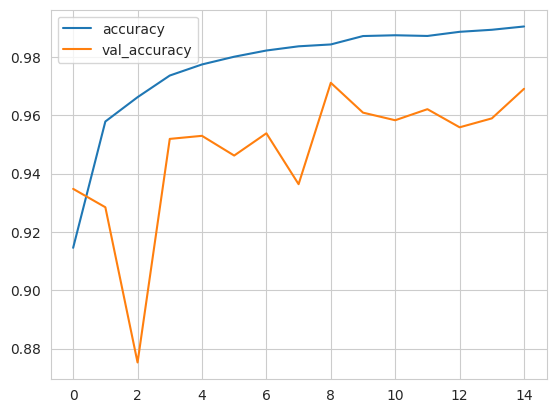

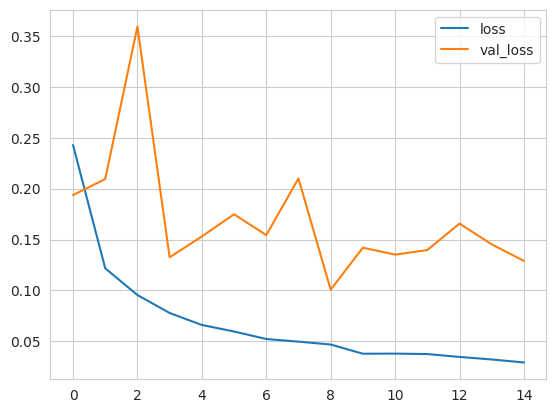

In [ ]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [ ]:
# Make Prediction
predict = model.predict(X_test)

685/685 [==============================] - 2s 3ms/step


In [ ]:
# Predicted o/p will be in probability distribution
predict

array([[9.9998844e-01, 1.0292523e-05, 1.9903524e-07, 1.1016301e-06,
        1.8353831e-09],
       [9.8936474e-01, 4.4663680e-06, 1.0512204e-02, 2.5249470e-08,
        1.1854951e-04],
       [9.9990582e-01, 8.9673376e-05, 4.2989679e-08, 2.4909200e-06,
        2.0574514e-06],
       ...,
       [8.0574755e-06, 1.4542229e-08, 6.9716684e-06, 3.1713810e-08,
        9.9998498e-01],
       [6.2909214e-07, 6.0864451e-08, 7.1803038e-06, 5.4143248e-12,
        9.9999213e-01],
       [1.2287936e-06, 8.3446838e-07, 2.1477590e-05, 2.1511739e-11,
        9.9997652e-01]], dtype=float32)

In [ ]:
# distributional probability to integers
yhat = np.argmax(predict, axis = 1)

**Checking the confusion matrix and classification report**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis = 1), yhat)

array([[17617,   229,   127,    84,    61],
       [   68,   472,    12,     2,     2],
       [   21,     7,  1388,    27,     5],
       [    9,     0,     6,   146,     1],
       [    7,     2,     6,     1,  1592]])

<Axes: >

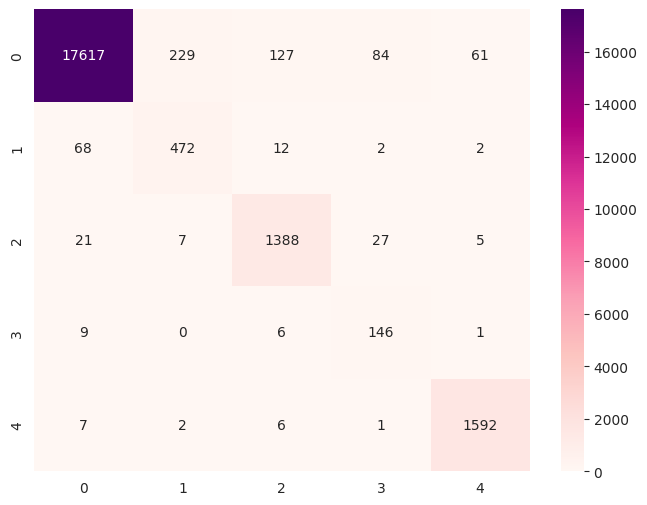

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis =1), yhat), annot = True, fmt = '0.0f', cmap= 'RdPu')

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), yhat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.66      0.85      0.75       556
           2       0.90      0.96      0.93      1448
           3       0.56      0.90      0.69       162
           4       0.96      0.99      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.82      0.93      0.86     21892
weighted avg       0.97      0.97      0.97     21892



In [ ]:
def download_history():
  import pickle
  from google.colab import files
  with open('history_model.pkl','wb') as f:
    pickle.dump(history.history,f)
  files.download('history_model.pkl')
download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>